In [2]:
#load libraries
!pip install scikit-learn
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
#data processing
!unzip gun_deaths.csv.zip




Archive:  gun_deaths.csv.zip
replace gun_deaths.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
df = pd.read_csv('gun_deaths.csv')

In [7]:
df.head(15)

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
5,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,Home,Less than HS
6,2012,2,Undetermined,0,M,48.0,White,Home,HS/GED
7,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,Home,HS/GED
8,2012,2,Accidental,0,M,50.0,White,Other specified,Some college
9,2012,2,Suicide,0,M,NaN,Black,Home,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int64  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   place      99414 non-null   object 
 8   education  99376 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [40]:
df['age'] = df['age'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   year       100798 non-null  int64 
 1   month      100798 non-null  int64 
 2   intent     100798 non-null  object
 3   police     100798 non-null  int64 
 4   sex        100798 non-null  object
 5   age        100798 non-null  int64 
 6   race       100798 non-null  object
 7   place      100798 non-null  object
 8   education  100798 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.9+ MB


In [13]:
df = df.replace(py.nan,0)

In [78]:
df.head(15)

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
5,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,Home,Less than HS
6,2012,2,Undetermined,0,M,48.0,White,Home,HS/GED
7,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,Home,HS/GED
8,2012,2,Accidental,0,M,50.0,White,Other specified,Some college
9,2012,2,Suicide,0,M,0.0,Black,Home,0


In [15]:
df_police=df.iloc[:,[2,3,6]]

In [17]:
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   intent  100798 non-null  object
 1   police  100798 non-null  int64 
 2   race    100798 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [19]:
df_police.head()

,intent,police,race
0,Suicide,0,Asian/Pacific Islander
1,Suicide,0,White
2,Suicide,0,White
3,Suicide,0,White
4,Suicide,0,White


In [21]:
df_police.describe()

,police
count,100798.000000
mean,0.013909
std,0.117114
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


(array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 3 BarContainer objects>)

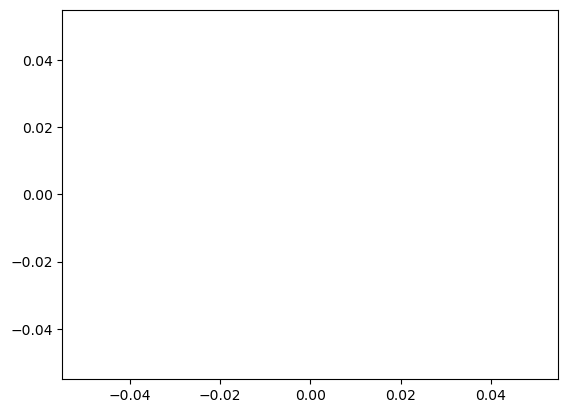

In [112]:
x = df_police[(df_police['intent'] == 'homicide') & (df['race'] == 1)]

plt.hist(x, density=True, bins=25)

In [88]:
df_police.sort_values('police', ascending=False)

,police,race
66549,1,White
68150,1,Black
28462,1,White
36764,1,Hispanic
45149,1,Black
...,...,...
33820,0,White
33819,0,White
33818,0,White
33817,0,Hispanic


In [26]:
df_police.sort_values( by= ['police','race'], ascending=False)[['police','race']]

,police,race
61,1,White
83,1,White
1004,1,White
1067,1,White
1111,1,White
...,...,...
100701,0,Asian/Pacific Islander
100714,0,Asian/Pacific Islander
100719,0,Asian/Pacific Islander
100782,0,Asian/Pacific Islander


<Axes: xlabel='age'>

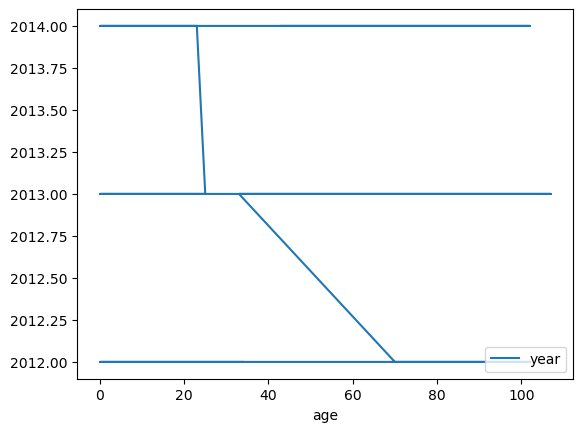

In [70]:
df.plot(x='age', y='year')



<Axes: xlabel='race', ylabel='age'>

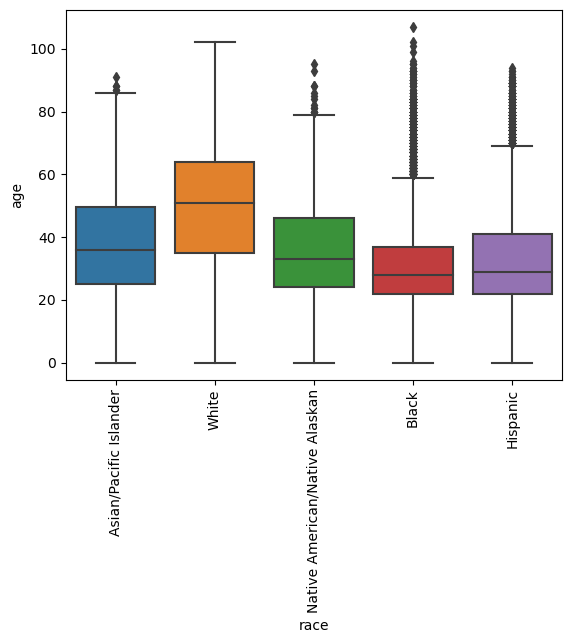

In [68]:
plt.xticks(rotation=90)
sns.boxplot(x='race', y='age', data=df)

array([<Axes: title={'center': '0'}, xlabel='race'>,
       <Axes: title={'center': 'Accidental'}, xlabel='race'>,
       <Axes: title={'center': 'Homicide'}, xlabel='race'>,
       <Axes: title={'center': 'Suicide'}, xlabel='race'>,
       <Axes: title={'center': 'Undetermined'}, xlabel='race'>],
      dtype=object)

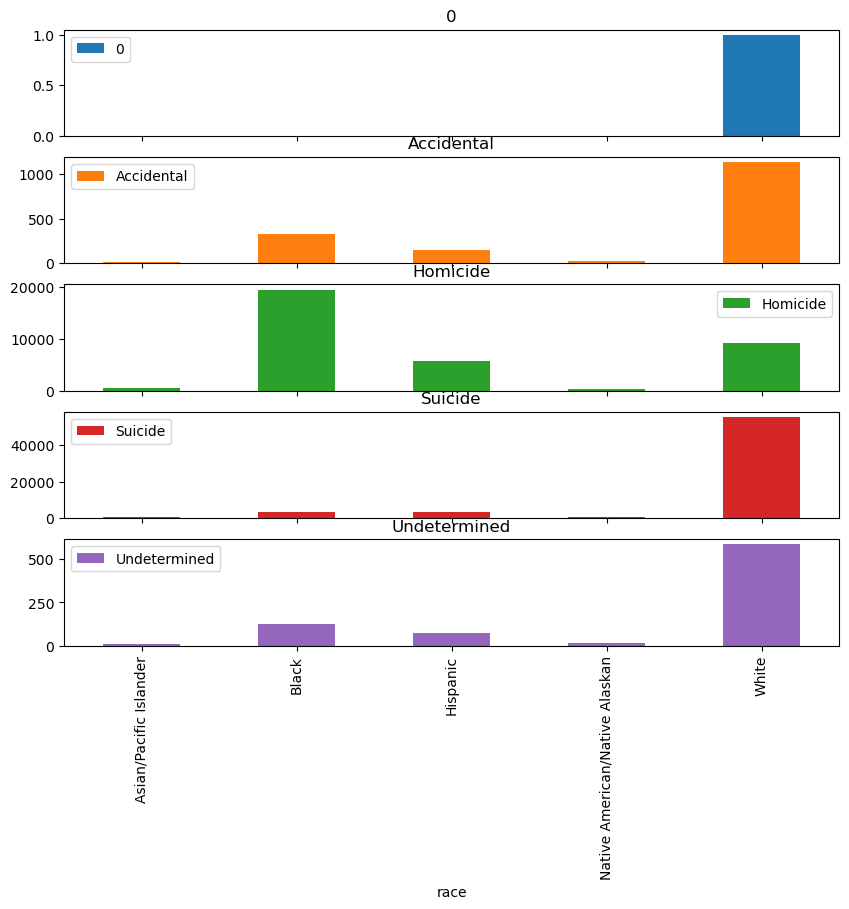

In [80]:
policeD= df_police[[ 'race', 'intent']].dropna()
policeD.groupby([ 'race', 'intent']).size().unstack(fill_value=0).plot.bar(subplots=True,figsize=(10,8))

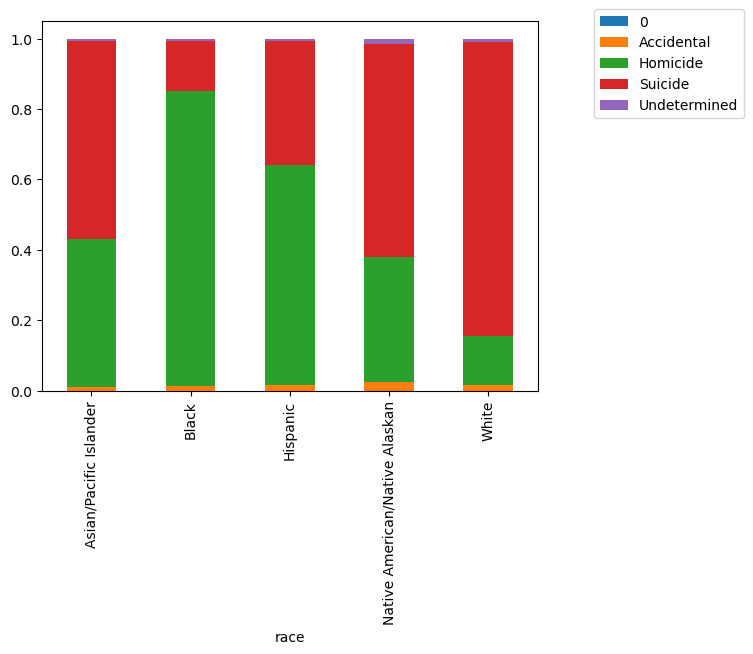

In [82]:
ax = df.groupby('race')['intent'].value_counts(normalize=True).unstack(level=1).plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

(array([0.00244868, 0.01224338, 0.02301755, 0.02987384, 0.02987384,
        0.02546623, 0.0279149 , 0.02595596, 0.01518179, 0.02693543,
        0.0181202 , 0.02105861, 0.02301755, 0.02252782, 0.01077417,
        0.01224338, 0.00489735, 0.00489735, 0.00342815, 0.00293841,
        0.00048974, 0.00097947, 0.00048974, 0.00146921, 0.00097947]),
 array([15.  , 17.88, 20.76, 23.64, 26.52, 29.4 , 32.28, 35.16, 38.04,
        40.92, 43.8 , 46.68, 49.56, 52.44, 55.32, 58.2 , 61.08, 63.96,
        66.84, 69.72, 72.6 , 75.48, 78.36, 81.24, 84.12, 87.  ]),
 <BarContainer object of 25 artists>)

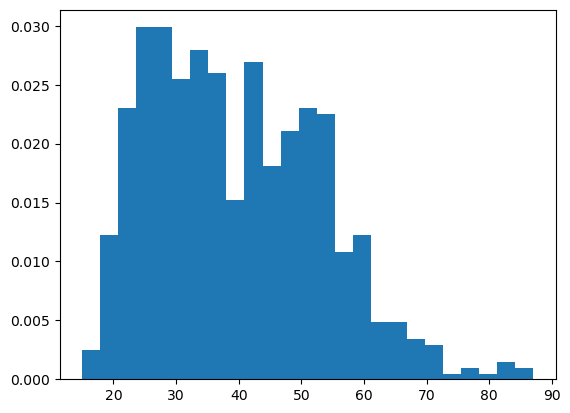

In [92]:
x = df[(df['race'] == 'White') & (df['police'] == 1)]
x = x['age']
plt.hist(x, density=True, bins=25)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   place   100798 non-null  object
 1   race    100798 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [104]:
x = df[(df['intent'] == 'homicide') & (df['race'] == 1)]
x = x['age']
plt.hist(x, density=True, bins=25)

KeyError: 'intent'

<Axes: xlabel='place'>

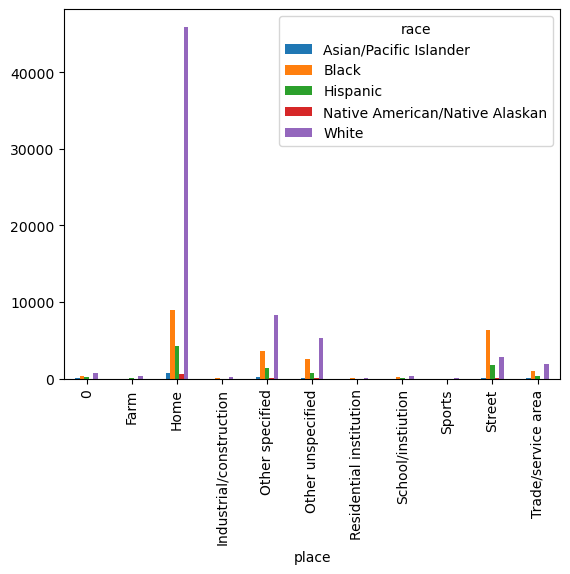

In [96]:
df = df[['place', 'race']].dropna()
df.groupby(['place', 'race']).size().unstack(fill_value=0).plot.bar()

In [50]:
id_list= df['race'].unique()

In [58]:
for i in id_list:
    df.loc[(df['race'] ==i)].hist(y=['police'], figsize=(15,4))
    plt.title(i, fontsize=18)
 
    plt.ylabel('police killings', fontsize=12)
    

Error in callback <function _draw_all_if_interactive at 0x7f65e3de8fe0> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: ['police']

ConversionError: Failed to convert value(s) to axis units: ['police']

<Figure size 1500x400 with 4 Axes>

ConversionError: Failed to convert value(s) to axis units: ['police']

<Figure size 1500x400 with 4 Axes>

ConversionError: Failed to convert value(s) to axis units: ['police']

<Figure size 1500x400 with 4 Axes>

ConversionError: Failed to convert value(s) to axis units: ['police']

<Figure size 1500x400 with 4 Axes>

ConversionError: Failed to convert value(s) to axis units: ['police']

<Figure size 1500x400 with 4 Axes>

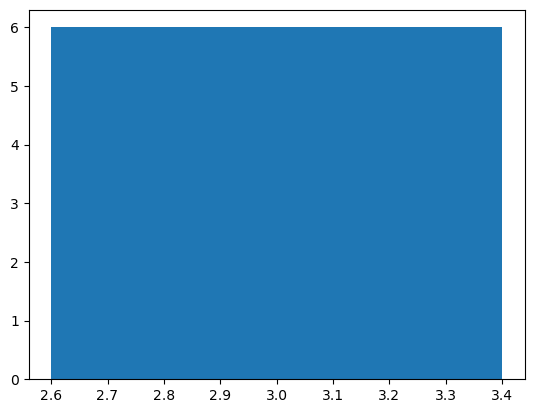

In [72]:
x= py.array([3])
y = py.array([6])
plt.bar(x,y)
plt.show()

In [5]:
#create model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler